# Testingdata Sentiwordnet with stopword cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
import nltk 
from nltk.corpus import sentiwordnet as swn

setting to show full text content

In [2]:
pd.set_option('display.max_colwidth', None)

## Loading data

In [3]:
df_sentiwordnet_without_stopwords = pd.read_csv('../../../Data-Preparation/sentiment140/testdata_without_stopwords_preprocessed.csv')

In [4]:
df_sentiwordnet_without_stopwords['target'].value_counts()

target
0    160000
4    160000
Name: count, dtype: int64

In [5]:
df_sentiwordnet_without_stopwords.head()

,Text,target,Ground_Truth_Label
0,would like even little bit time work Laying 11 30 work 12 30 8 30,0,negative
1,Looking forward keeping touch Naomi long time since chatted,4,positive
2,Germany NBA airtime got International LP watch game sure,0,negative
3,future trouble favourite Bagley probably Running Blind Iceland Terrific,4,positive
4,know reason Opera popular mobile platform Firefox rocks ass,4,positive


In [6]:
df_sentiwordnet_without_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>      318365
<class 'float'>      1635
Name: count, dtype: int64

In [7]:
df_sentiwordnet_without_stopwords['Text'] = df_sentiwordnet_without_stopwords['Text'].astype(str)


In [8]:
df_sentiwordnet_without_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>    320000
Name: count, dtype: int64

## Classifying sentiments 

This classifier calculates the average sentiment score of all possible meanings (lemmas) of a word. It doesn't consider the context in which the word is used but instead provides a general average sentiment score based on all its meanings.

In [9]:
def naiveSentiment(review):
    reviewPolarity = 0.0
    numExceptions = 0
    words = review.lower().split()
    
    for word in words:
        numMeanings = 0
        weight = 0.0
        synsets = list(swn.senti_synsets(word))
        if synsets:
            for meaning in synsets:
                pos_score = meaning.pos_score()
                neg_score = meaning.neg_score()
                if pos_score > neg_score:
                    weight += (pos_score - neg_score)
                    numMeanings += 1
                elif pos_score < neg_score:
                    weight -= (neg_score - pos_score)
                    numMeanings += 1
        else:
            numExceptions += 1
        if numMeanings > 0:
            reviewPolarity += (weight / numMeanings)
    return reviewPolarity

In [10]:
df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'] = df_sentiwordnet_without_stopwords['Text'].apply(lambda x: 'positive' if naiveSentiment(x) >= 0 else 'negative')


In [11]:
df_sentiwordnet_without_stopwords

,Text,target,Ground_Truth_Label,Sentiwordnet_Classification
0,would like even little bit time work Laying 11 30 work 12 30 8 30,0,negative,positive
1,Looking forward keeping touch Naomi long time since chatted,4,positive,positive
2,Germany NBA airtime got International LP watch game sure,0,negative,negative
3,future trouble favourite Bagley probably Running Blind Iceland Terrific,4,positive,negative
4,know reason Opera popular mobile platform Firefox rocks ass,4,positive,positive
...,...,...,...,...
319995,nan,4,positive,positive
319996,idea wear tomorrow,0,negative,negative
319997,darn think journey like really,0,negative,positive
319998,oh Calvin Harris called DAFT BASTARD feel cool new claim fame,4,positive,negative


In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.610371875


## Testing quality of the classifier on testing data

In [13]:
accuracy = accuracy_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'])
precision = precision_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'], pos_label='positive')
recall = recall_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'], pos_label='positive')
f1 = f1_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'], pos_label='positive')

In [14]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.61
Precision: 0.58
Recall: 0.79
F1 Score: 0.67


In [15]:
print("\nClassification Report:\n")
print(classification_report(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.67      0.43      0.52    160000
    positive       0.58      0.79      0.67    160000

    accuracy                           0.61    320000
   macro avg       0.63      0.61      0.60    320000
weighted avg       0.63      0.61      0.60    320000



creating heatmap to visualize false positives and false negatives

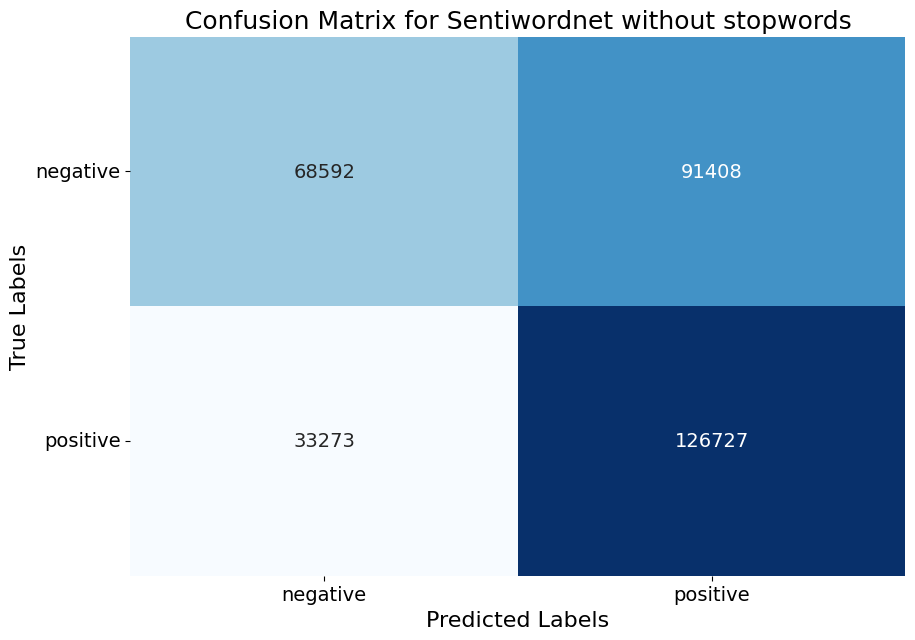

In [16]:
cm_nb = confusion_matrix(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for Sentiwordnet without stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()